# Convolutional Autoencoder

Sur dataset OBAMA voir drive


In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
"préparation des données"
path = 'lips//res//frame'
nframe=10000

trainingLength = int(0.9*nframe)   #Nombre de frame que l'on garde pour l'entrainement, le reste sera pour le test
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

image1 = rgb2gray(mpimg.imread(path  + str(1) + '.jpg')) #Load the first image

imageSize = image1.shape
num_inputs=imageSize[0]*imageSize[1]  # taille image entrée si les images ont bien été resized

lips = np.zeros((nframe,imageSize[0], imageSize[1]))

for i in range(1,nframe-1):
#    print(len(mpimg.imread(path  + str(i+1) + '.jpg')))
#    print(len(mpimg.imread(path  + str(i+1) + '.jpg')[0]))
#    lips[i-1] = np.reshape(mpimg.imread(path  + str(i+1) + '.jpg',grayscale),(41*69,1))
#    Without resizing :
    lips[i-1] = rgb2gray(mpimg.imread(path  + str(i) + '.jpg'))

lipsTrain=lips[:trainingLength]
lipsTest=lips[trainingLength:]

FileNotFoundError: [Errno 2] No such file or directory: 'lips//res//frame200.jpg'

CNN Autoencodeur


In [3]:
learning_rate = 0.001
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, 48,80,1), name="input")
targets_ = tf.placeholder(tf.float32, (None, 48,80,1), name="target")

### Encoder
with tf.name_scope("Encoder"):
    conv1 = tf.layers.conv2d(inputs=inputs_, filters=16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
    # Now 48x80x16
    maxpool1 = tf.layers.max_pooling2d(conv1, pool_size=(2,2), strides=(2,2), padding='same')
    # Now 24x40x16
    conv2 = tf.layers.conv2d(inputs=maxpool1, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
    # Now 24x40x8
    maxpool2 = tf.layers.max_pooling2d(conv2, pool_size=(2,2), strides=(2,2), padding='same')
    # Now 12x20x8
    conv3 = tf.layers.conv2d(inputs=maxpool2, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
    # Now 12x20x8
    encoded = tf.layers.max_pooling2d(conv3, pool_size=(2,2), strides=(2,2), padding='same')
    # Now 6x10x8

### Decoder
upsample1 = tf.image.resize_images(encoded, size=(12,20), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 6x10x8
conv4 = tf.layers.conv2d(inputs=upsample1, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 6x10x8
upsample2 = tf.image.resize_images(conv4, size=(24,40), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 12x20x8
conv5 = tf.layers.conv2d(inputs=upsample2, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 24x40x8
upsample3 = tf.image.resize_images(conv5, size=(48,80), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 48x80x8
conv6 = tf.layers.conv2d(inputs=upsample3, filters=16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 48x80x16

logits = tf.layers.conv2d(inputs=conv6, filters=1, kernel_size=(3,3), padding='same', activation=None)
#Now 48x80x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits)

# Pass logits through sigmoid and calculate the square loss
loss = tf.square(targets_-logits)
tf.summary.histogram("loss", loss)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [4]:
# Tensorboard treatment
summ = tf.summary.merge_all()

## Training

As before, here we'll train the network. Instead of flattening the images though, we can pass them in as 28x28x1 arrays.

In [5]:
sess = tf.Session()

In [6]:
num_epochs = 5
batch_size = 50
sess.run(tf.global_variables_initializer())
for epoch in range(num_epochs):
    for iteration in range(len(lipsTrain)//batch_size):
        batch = lipsTrain[iteration*batch_size:(iteration+1)*batch_size]
        imgs = batch.reshape((-1, 48, 80, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})



        print("Epoch: {}/{}...".format(epoch+1, num_epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/5... Training loss: 16918.7422
Epoch: 1/5... Training loss: 16957.7617
Epoch: 1/5... Training loss: 15274.8438
Epoch: 1/5... Training loss: 14563.0986
Epoch: 1/5... Training loss: 13098.4561
Epoch: 1/5... Training loss: 12445.6143
Epoch: 1/5... Training loss: 9429.3711
Epoch: 1/5... Training loss: 7250.6992
Epoch: 1/5... Training loss: 6017.7207
Epoch: 1/5... Training loss: 3875.1526
Epoch: 1/5... Training loss: 2230.7708
Epoch: 1/5... Training loss: 1642.5205
Epoch: 1/5... Training loss: 2744.1873
Epoch: 1/5... Training loss: 3481.2461
Epoch: 1/5... Training loss: 3668.2625
Epoch: 1/5... Training loss: 3520.4087
Epoch: 1/5... Training loss: 2664.5410
Epoch: 1/5... Training loss: 1705.4535
Epoch: 1/5... Training loss: 1312.2253
Epoch: 1/5... Training loss: 1317.5321
Epoch: 1/5... Training loss: 1558.7457
Epoch: 1/5... Training loss: 1642.6913
Epoch: 1/5... Training loss: 1722.2725
Epoch: 1/5... Training loss: 2036.8290
Epoch: 1/5... Training loss: 1859.0397
Epoch: 1/5... Train

Epoch: 2/5... Training loss: 189.9179
Epoch: 2/5... Training loss: 229.5647
Epoch: 2/5... Training loss: 215.6845
Epoch: 2/5... Training loss: 259.5252
Epoch: 2/5... Training loss: 198.0116
Epoch: 2/5... Training loss: 181.1527
Epoch: 2/5... Training loss: 222.1030
Epoch: 2/5... Training loss: 195.3231
Epoch: 2/5... Training loss: 199.6046
Epoch: 2/5... Training loss: 192.1853
Epoch: 2/5... Training loss: 169.9081
Epoch: 2/5... Training loss: 176.3501
Epoch: 2/5... Training loss: 173.0691
Epoch: 2/5... Training loss: 199.3735
Epoch: 2/5... Training loss: 179.9808
Epoch: 2/5... Training loss: 230.4479
Epoch: 2/5... Training loss: 228.4005
Epoch: 2/5... Training loss: 188.7117
Epoch: 2/5... Training loss: 220.0793
Epoch: 2/5... Training loss: 185.3279
Epoch: 2/5... Training loss: 214.3217
Epoch: 2/5... Training loss: 171.7110
Epoch: 2/5... Training loss: 186.1123
Epoch: 2/5... Training loss: 239.5250
Epoch: 2/5... Training loss: 237.0322
Epoch: 2/5... Training loss: 236.5664
Epoch: 2/5..

Epoch: 3/5... Training loss: 166.3380
Epoch: 3/5... Training loss: 123.6739
Epoch: 3/5... Training loss: 127.2309
Epoch: 3/5... Training loss: 120.4421
Epoch: 3/5... Training loss: 132.5051
Epoch: 3/5... Training loss: 157.4841
Epoch: 3/5... Training loss: 133.0293
Epoch: 3/5... Training loss: 134.7092
Epoch: 3/5... Training loss: 131.1533
Epoch: 3/5... Training loss: 136.5210
Epoch: 3/5... Training loss: 124.4245
Epoch: 3/5... Training loss: 141.2704
Epoch: 3/5... Training loss: 163.9595
Epoch: 3/5... Training loss: 115.1018
Epoch: 3/5... Training loss: 118.7225
Epoch: 3/5... Training loss: 148.5729
Epoch: 3/5... Training loss: 153.1836
Epoch: 3/5... Training loss: 121.8611
Epoch: 3/5... Training loss: 144.3178
Epoch: 3/5... Training loss: 118.8710
Epoch: 3/5... Training loss: 140.0310
Epoch: 3/5... Training loss: 150.4810
Epoch: 3/5... Training loss: 103.3816
Epoch: 3/5... Training loss: 143.8553
Epoch: 3/5... Training loss: 166.6431
Epoch: 3/5... Training loss: 104.1974
Epoch: 3/5..

Epoch: 4/5... Training loss: 113.9891
Epoch: 4/5... Training loss: 89.7314
Epoch: 4/5... Training loss: 103.0770
Epoch: 4/5... Training loss: 98.6012
Epoch: 4/5... Training loss: 109.6440
Epoch: 4/5... Training loss: 120.8737
Epoch: 4/5... Training loss: 135.4072
Epoch: 4/5... Training loss: 87.5174
Epoch: 4/5... Training loss: 97.9434
Epoch: 4/5... Training loss: 107.7236
Epoch: 4/5... Training loss: 112.5919
Epoch: 4/5... Training loss: 74.4146
Epoch: 4/5... Training loss: 73.2702
Epoch: 4/5... Training loss: 102.2389
Epoch: 4/5... Training loss: 104.4999
Epoch: 4/5... Training loss: 100.8207
Epoch: 4/5... Training loss: 91.8872
Epoch: 4/5... Training loss: 100.0094
Epoch: 4/5... Training loss: 104.1348
Epoch: 4/5... Training loss: 108.1850
Epoch: 4/5... Training loss: 94.1100
Epoch: 4/5... Training loss: 100.4501
Epoch: 4/5... Training loss: 89.6806
Epoch: 4/5... Training loss: 89.2048
Epoch: 4/5... Training loss: 93.6237
Epoch: 4/5... Training loss: 118.5315
Epoch: 4/5... Training 

Epoch: 5/5... Training loss: 95.5338
Epoch: 5/5... Training loss: 98.1525
Epoch: 5/5... Training loss: 109.5580
Epoch: 5/5... Training loss: 87.9694
Epoch: 5/5... Training loss: 110.1186
Epoch: 5/5... Training loss: 109.3333
Epoch: 5/5... Training loss: 99.0978
Epoch: 5/5... Training loss: 94.5306
Epoch: 5/5... Training loss: 76.7575
Epoch: 5/5... Training loss: 93.1081
Epoch: 5/5... Training loss: 102.2110
Epoch: 5/5... Training loss: 95.8535
Epoch: 5/5... Training loss: 99.7314
Epoch: 5/5... Training loss: 91.2484
Epoch: 5/5... Training loss: 92.7340
Epoch: 5/5... Training loss: 75.4778
Epoch: 5/5... Training loss: 75.8318
Epoch: 5/5... Training loss: 76.4753
Epoch: 5/5... Training loss: 108.9728
Epoch: 5/5... Training loss: 74.8975
Epoch: 5/5... Training loss: 83.8337
Epoch: 5/5... Training loss: 67.8792
Epoch: 5/5... Training loss: 98.0865
Epoch: 5/5... Training loss: 96.8797
Epoch: 5/5... Training loss: 81.9731
Epoch: 5/5... Training loss: 124.1021
Epoch: 5/5... Training loss: 78.

In [ ]:
# TensorBoard treatment
writer = tf.summary.FileWriter('tmp/CNN/1', sess.graph)


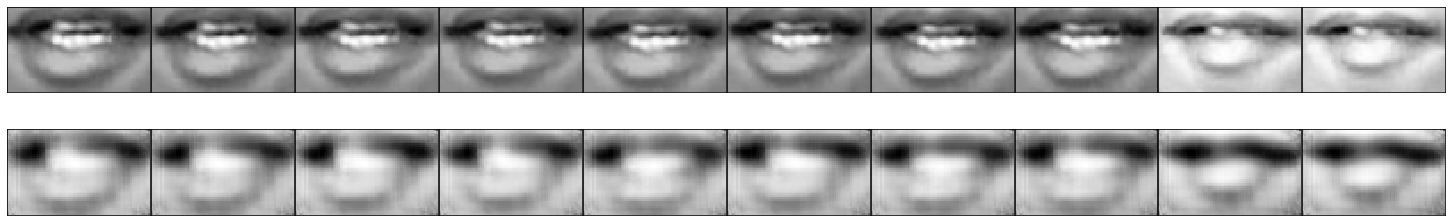

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = lipsTest[:10]
reconstructed = sess.run([logits, summ], feed_dict={inputs_: in_imgs.reshape((10, 48, 80, 1))})
writer.add_summary(reconstructed)

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((48, 80)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [9]:
sess.close()